<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7813/4147344691.py:8: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(filename, sep='\s+', header=None)


ANÁLISIS DE ESTABILIDAD - SISTEMA ν OCTANTIS

=== COMPONENTE BINARIA (Ν OCT B) ===
Tiempo integrado: 213.3 años
MEGNO final: 87.139
→ CAÓTICO/INESTABLE
Δe máximo: 9.230026
Δa máximo: 0.004996 AU


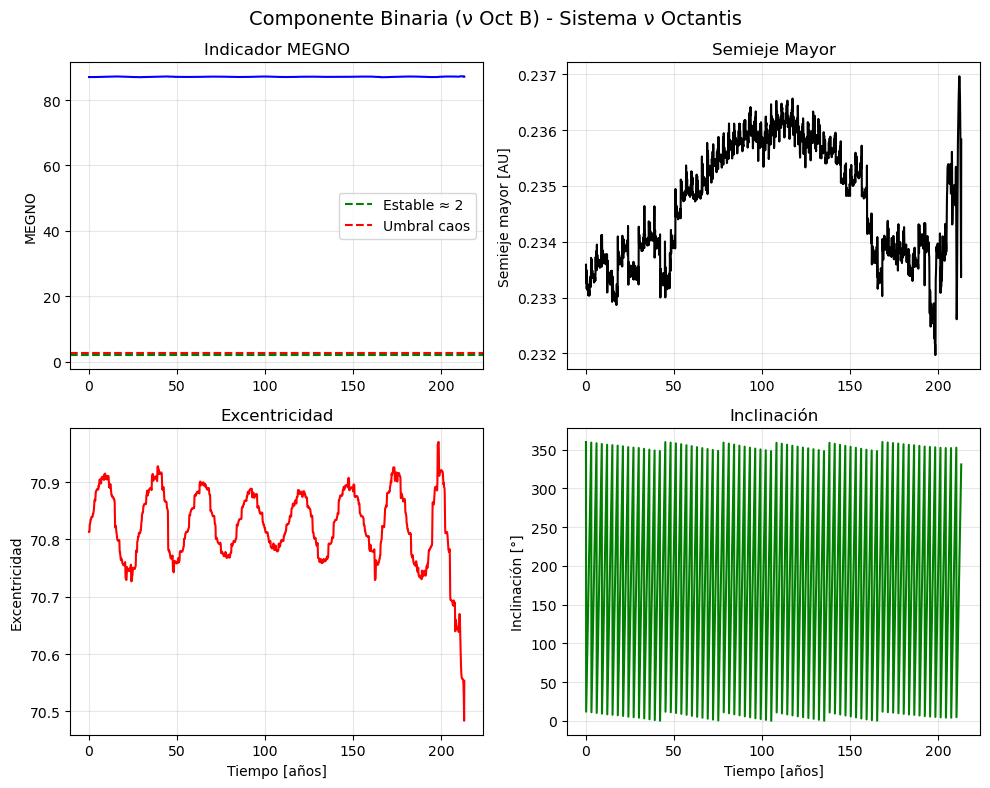


=== PLANETA (Ν OCT AB) ===
Tiempo integrado: 213.2 años
MEGNO final: 59.050
→ CAÓTICO/INESTABLE
Δe máximo: 9.220351
Δa máximo: 0.950530 AU


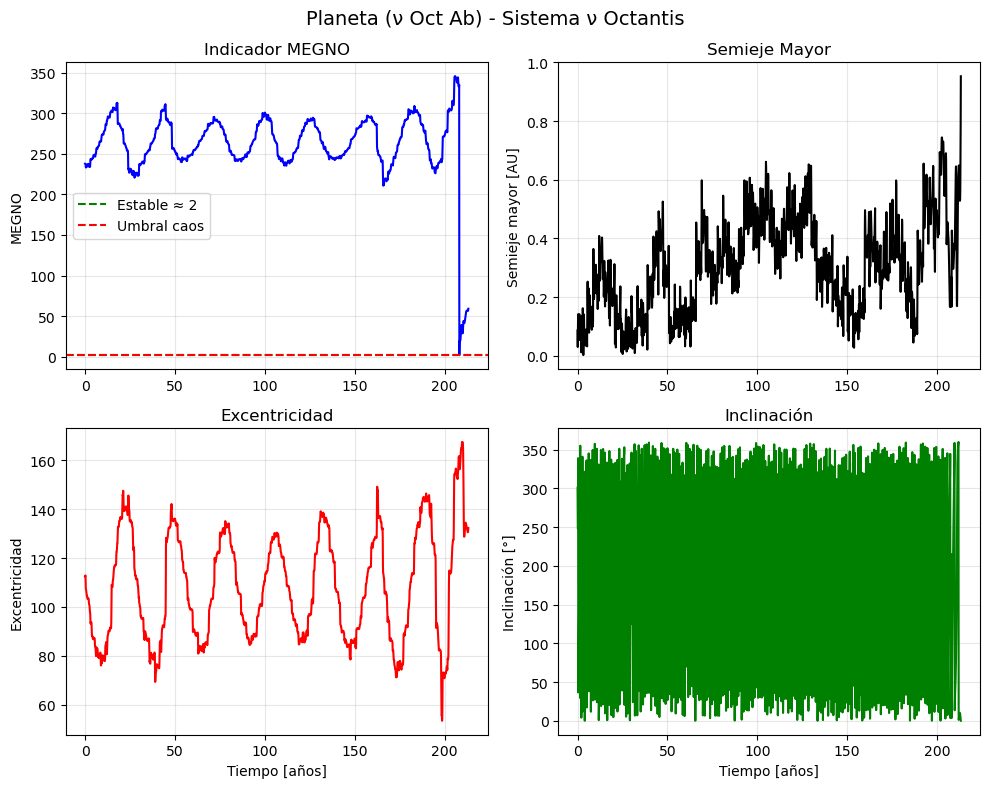


=== COMPARACIÓN ===
MEGNO Binaria: 87.139
MEGNO Planeta: 59.050
→ Planeta en órbita inestable


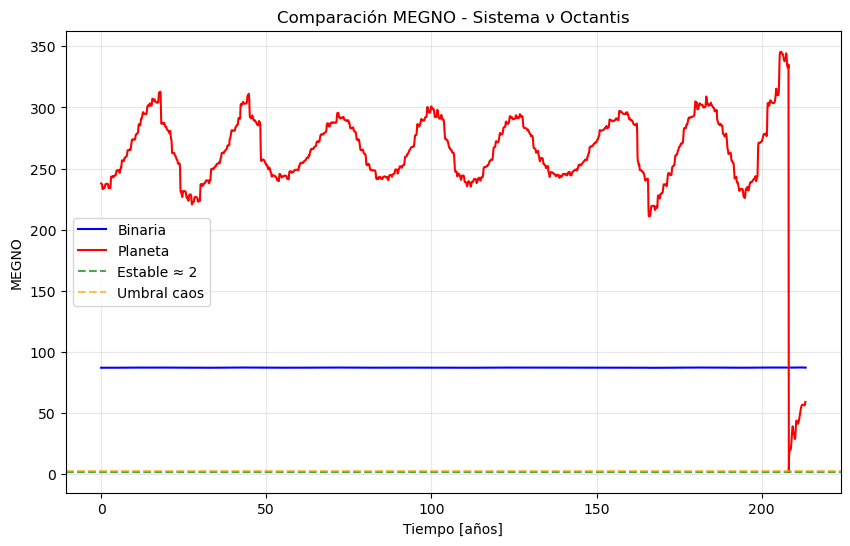

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_data(filename):
    """Lee los archivos de datos de NCORP"""
    try:
        data = pd.read_csv(filename, sep='\s+', header=None)
        return data
    except:
        print(f"Error leyendo {filename}")
        return None

def analyze_planet_stability(filename, planet_name):
    """Analiza la estabilidad de un planeta específico"""
    data = read_data(filename)
    
    if data is None:
        return
    
    # Extraer columnas principales
    time = data.iloc[:, 0]  # Tiempo
    
    # Elementos orbitales básicos (asumiendo estructura estándar)
    if data.shape[1] >= 6:
        a = data.iloc[:, 2]  # Semieje mayor  
        e = data.iloc[:, 3]  # Excentricidad
        i = data.iloc[:, 4]  # Inclinación
    
    # Indicadores de caos (últimas columnas)
    n_cols = data.shape[1]
    if n_cols >= 4:
        megno = data.iloc[:, -4]      # MEGNO
        delta_e = data.iloc[:, -3]    # Variación excentricidad
        delta_a = data.iloc[:, -2]    # Variación semieje mayor
        delta_i = data.iloc[:, -1]    # Variación inclinación
    
    # Análisis de estabilidad
    print(f"\n=== {planet_name.upper()} ===")
    print(f"Tiempo integrado: {time.iloc[-1]:.1f} años")
    
    if 'megno' in locals():
        megno_final = megno.iloc[-1]
        print(f"MEGNO final: {megno_final:.3f}")
        
        if megno_final <= 2.5:
            print("→ ESTABLE")
        else:
            print("→ CAÓTICO/INESTABLE")
        
        print(f"Δe máximo: {delta_e.max():.6f}")
        print(f"Δa máximo: {delta_a.max():.6f} AU")
    
    # Gráficos
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle(f'{planet_name} - Sistema ν Octantis', fontsize=14)
    
    # MEGNO
    if 'megno' in locals():
        axes[0,0].plot(time, megno, 'b-')
        axes[0,0].axhline(y=2.0, color='g', linestyle='--', label='Estable ≈ 2')
        axes[0,0].axhline(y=2.5, color='r', linestyle='--', label='Umbral caos')
        axes[0,0].set_ylabel('MEGNO')
        axes[0,0].set_title('Indicador MEGNO')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
    
    # Elementos orbitales
    if 'a' in locals():
        axes[0,1].plot(time, a, 'k-')
        axes[0,1].set_ylabel('Semieje mayor [AU]')
        axes[0,1].set_title('Semieje Mayor')
        axes[0,1].grid(True, alpha=0.3)
        
        axes[1,0].plot(time, e, 'r-')
        axes[1,0].set_ylabel('Excentricidad')
        axes[1,0].set_xlabel('Tiempo [años]')
        axes[1,0].set_title('Excentricidad')
        axes[1,0].grid(True, alpha=0.3)
        
        axes[1,1].plot(time, i, 'g-')
        axes[1,1].set_ylabel('Inclinación [°]')
        axes[1,1].set_xlabel('Tiempo [años]')
        axes[1,1].set_title('Inclinación')
        axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Análisis principal
print("ANÁLISIS DE ESTABILIDAD - SISTEMA ν OCTANTIS")
print("=" * 50)

# Analizar componente binaria
analyze_planet_stability('planet1.dat', 'Componente Binaria (ν Oct B)')

# Analizar planeta
analyze_planet_stability('planet2.dat', 'Planeta (ν Oct Ab)')

# Comparación rápida si ambos archivos existen
data1 = read_data('planet1.dat')
data2 = read_data('planet2.dat')

if data1 is not None and data2 is not None:
    print(f"\n=== COMPARACIÓN ===")
    
    # MEGNO final de ambos cuerpos
    megno1 = data1.iloc[-1, -4] if data1.shape[1] >= 4 else None
    megno2 = data2.iloc[-1, -4] if data2.shape[1] >= 4 else None
    
    if megno1 is not None and megno2 is not None:
        print(f"MEGNO Binaria: {megno1:.3f}")
        print(f"MEGNO Planeta: {megno2:.3f}")
        
        if megno2 <= 2.5:
            print("→ Planeta en órbita estable")
        else:
            print("→ Planeta en órbita inestable")
            
        # Gráfico comparativo de MEGNO
        plt.figure(figsize=(10, 6))
        plt.plot(data1.iloc[:, 0], data1.iloc[:, -4], 'b-', label='Binaria', linewidth=1.5)
        plt.plot(data2.iloc[:, 0], data2.iloc[:, -4], 'r-', label='Planeta', linewidth=1.5)
        plt.axhline(y=2.0, color='g', linestyle='--', alpha=0.7, label='Estable ≈ 2')
        plt.axhline(y=2.5, color='orange', linestyle='--', alpha=0.7, label='Umbral caos')
        plt.ylabel('MEGNO')
        plt.xlabel('Tiempo [años]')
        plt.title('Comparación MEGNO - Sistema ν Octantis')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

Archivo leído con 11 columnas y 102 filas (filas ~ cuerpos).
Asumido formato: time, ID, a, e, I, M, w, Omega, MEGNO, Delta_a, Delta_e


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7813/1927938000.py:16: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(sio, sep='\s+', header=None, engine='python')


Partículas detectadas: 100 (IDs > 2)

Resumen (primeras filas) de partículas:
 ID        a        e        I     MEGNO    Delta_a   Delta_e
  3 1.276000 0.000000 0.000000 10.000000 100.000000 -1.000000
  4 1.290200 0.000000 0.000000 10.000000 100.000000 -1.000000
  5 1.304300 0.000000 0.000000 10.000000 100.000000 -1.000000
  6 1.318500 0.000000 0.000000 10.000000 100.000000 -1.000000
  7 1.332700 0.000000 0.000000 10.000000 100.000000 -1.000000
  8 1.346900 0.000000 0.000000 10.000000 100.000000 -1.000000
  9 1.361000 0.000000 0.000000 10.000000 100.000000 -1.000000
 10 1.375200 0.000000 0.000000 10.000000 100.000000 -1.000000
 11 1.389400 0.000000 0.000000 10.000000 100.000000 -1.000000
 12 1.403500 0.000000 0.000000 10.000000 100.000000 -1.000000
 13 1.417700 0.000000 0.000000 10.000000 100.000000 -1.000000
 14 1.431900 0.000000 0.000000 10.000000 100.000000 -1.000000
 15 1.446100 0.000000 0.000000 10.000000 100.000000 -1.000000
 16 1.460200 0.000000 0.000000 10.000000 100.000000 -1

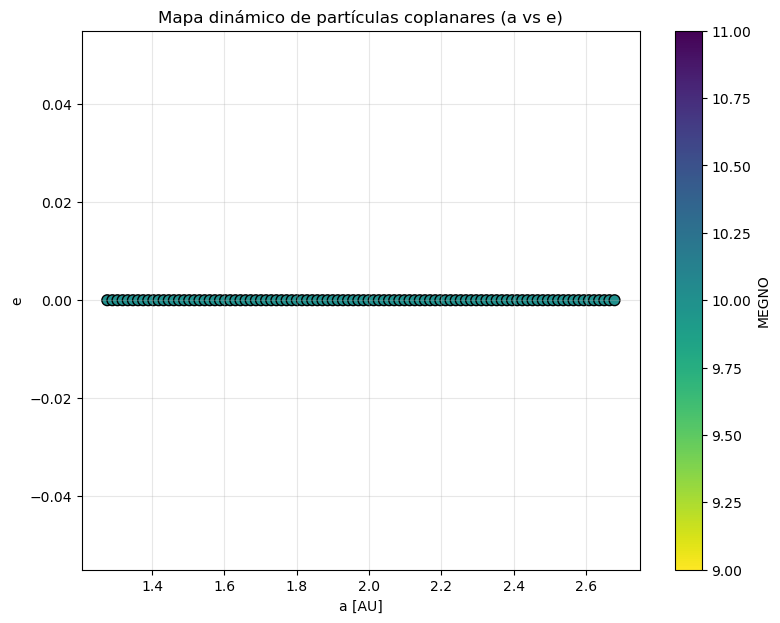

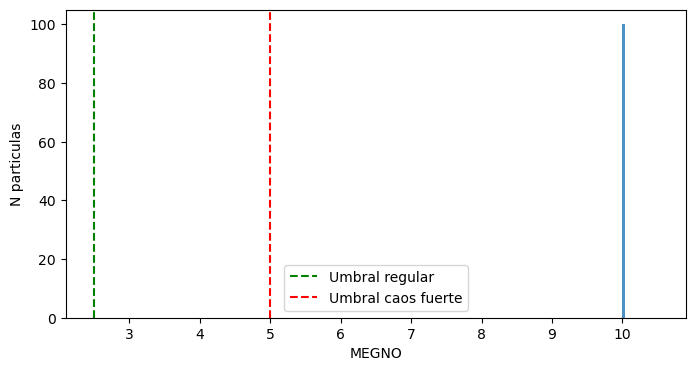


Conteo por clases MEGNO:
MEGNO_class
Caótica (Alta)    100
Name: count, dtype: int64
Clasificación guardada en: particles_classified.csv

Si tienes archivos de series temporales por partícula (p.ej. particle_101.dat) puedes usar analyze_planet_stability() definido en la celda superior para analizarlos individualmente.


In [2]:
# === Análisis de partículas coplanares usando `chaos.dat` ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from io import StringIO

fn = Path('chaos.dat')
if not fn.exists():
    raise FileNotFoundError(f"No se encuentra {fn.resolve()}")
# Leer y normalizar notación Fortran D->E
raw = fn.read_text()
raw = raw.replace('D+', 'E+').replace('D-', 'E-').replace('d+', 'E+').replace('d-', 'E-')
sio = StringIO(raw)
# Intentar inferir columnas por forma común (muestra del archivo tiene 11 columnas)
df = pd.read_csv(sio, sep='\s+', header=None, engine='python')
ncol = df.shape[1]
print(f'Archivo leído con {ncol} columnas y {len(df)} filas (filas ~ cuerpos).')
# Asignar nombres según formato detectado
if ncol >= 11:
    df.columns = ['time','ID','a','e','I','M','w','Omega','MEGNO','Delta_a','Delta_e']
    print('Asumido formato: time, ID, a, e, I, M, w, Omega, MEGNO, Delta_a, Delta_e')
elif ncol == 10:
    df.columns = ['time','ID','a','e','I','M','w','Omega','MEGNO','Delta_a']
    print('Asumido formato con 10 columnas (sin Delta_e)')
else:
    # fallback - asignar nombres genéricos por posición
    names = [f'c{i}' for i in range(ncol)]
    df.columns = names
    print('Formato no estándar: nombres genéricos asignados por posición')
# Forzar numerico por columna (coerce -> NaN)
for c in df.columns:
    df[c] = pd.to_numeric(df[c].astype(str).str.strip(), errors='coerce')
# Filtrar partículas: IDs mayores que numero de planetas (por defecto 2)
N_PLANETAS = 2
if 'ID' in df.columns:
    particles = df[df['ID'] > N_PLANETAS].copy()
else:
    particles = df.copy()
print(f'Partículas detectadas: {len(particles)} (IDs > {N_PLANETAS})')
# Clasificaciones simples (igual que para planetas)
MEGNO_REG = 2.5
MEGNO_HIGH = 5.0
if 'MEGNO' in particles.columns:
    particles['MEGNO_class'] = 'Regular'
    particles.loc[particles['MEGNO'] > MEGNO_REG, 'MEGNO_class'] = 'Caótica (Baja)'
    particles.loc[particles['MEGNO'] > MEGNO_HIGH, 'MEGNO_class'] = 'Caótica (Alta)'
else:
    particles['MEGNO_class'] = 'Unknown'
# Delta e classification if present
if 'Delta_e' in particles.columns:
    particles['Delta_e_class'] = np.where(particles['Delta_e'] < 0.2, 'Estable', 'Inestable (Δe alto)')
else:
    particles['Delta_e_class'] = 'Unknown'
# Mostrar un resumen tabulado similar al análisis de planeta
pd.set_option('display.float_format', lambda x: f"{x:.6f}")
summary_cols = []
for col in ['ID','a','e','I','MEGNO','Delta_a','Delta_e']:
    if col in particles.columns:
        summary_cols.append(col)
print('\nResumen (primeras filas) de partículas:')
print(particles[summary_cols].head(20).to_string(index=False))

# Listado de partículas inestables (por MEGNO o Delta_e)
unstable_megno = particles[particles['MEGNO_class'].str.contains('Caótica')]
print(f"\nPartículas con MEGNO caótico: {len(unstable_megno)}")
if not unstable_megno.empty:
    print(unstable_megno[['ID','a','e','MEGNO']].head(20).to_string(index=False))

# Graficar mapa a vs e coloreado por MEGNO (si disponible)
if 'a' in particles.columns and 'e' in particles.columns:
    plt.figure(figsize=(9,7))
    c = particles['MEGNO'] if 'MEGNO' in particles.columns else None
    sc = plt.scatter(particles['a'], particles['e'], c=c, cmap='viridis_r', s=60, edgecolor='k')
    if c is not None:
        plt.colorbar(sc, label='MEGNO')
    plt.xlabel('a [AU]')
    plt.ylabel('e')
    plt.title('Mapa dinámico de partículas coplanares (a vs e)')
    plt.grid(alpha=0.3)
    plt.show()

# Histograma MEGNO y conteo por clase
if 'MEGNO' in particles.columns:
    plt.figure(figsize=(8,4))
    plt.hist(particles['MEGNO'].dropna(), bins=30, color='C0', alpha=0.8)
    plt.axvline(MEGNO_REG, color='g', linestyle='--', label='Umbral regular')
    plt.axvline(MEGNO_HIGH, color='r', linestyle='--', label='Umbral caos fuerte')
    plt.xlabel('MEGNO')
    plt.ylabel('N particulas')
    plt.legend()
    plt.show()

print('\nConteo por clases MEGNO:')
if 'MEGNO_class' in particles.columns:
    print(particles['MEGNO_class'].value_counts())

# Guardar CSV de particulas clasificadas (opcional)
outcsv = Path('particles_classified.csv')
particles.to_csv(outcsv, index=False)
print(f'Clasificación guardada en: {outcsv}')

# Si quieres inspeccionar la trayectoria temporal de una partícula específica
print('\nSi tienes archivos de series temporales por partícula (p.ej. particle_101.dat) puedes usar analyze_planet_stability() definido en la celda superior para analizarlos individualmente.')

Read 8297 rows with 11 columns from ncorp13.dat
Plotting ids: [3, 4, 5, 6, 7, 8]


/tmp/ipykernel_7813/3400612666.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(sio, delim_whitespace=True, header=None, comment='!')


Saved figure to particles_evolution.png


,id,n_rows,a0,e0,MEGNO_last
0,1,354,2.621062,0.233911,2.145058
1,2,354,1.276000,0.086000,2.145058
2,3,341,1.273195,0.002854,9.516860
3,4,204,1.287336,0.002870,7.369895
4,5,80,1.301377,0.002886,3.426242
5,6,80,1.315517,0.002902,2.832244


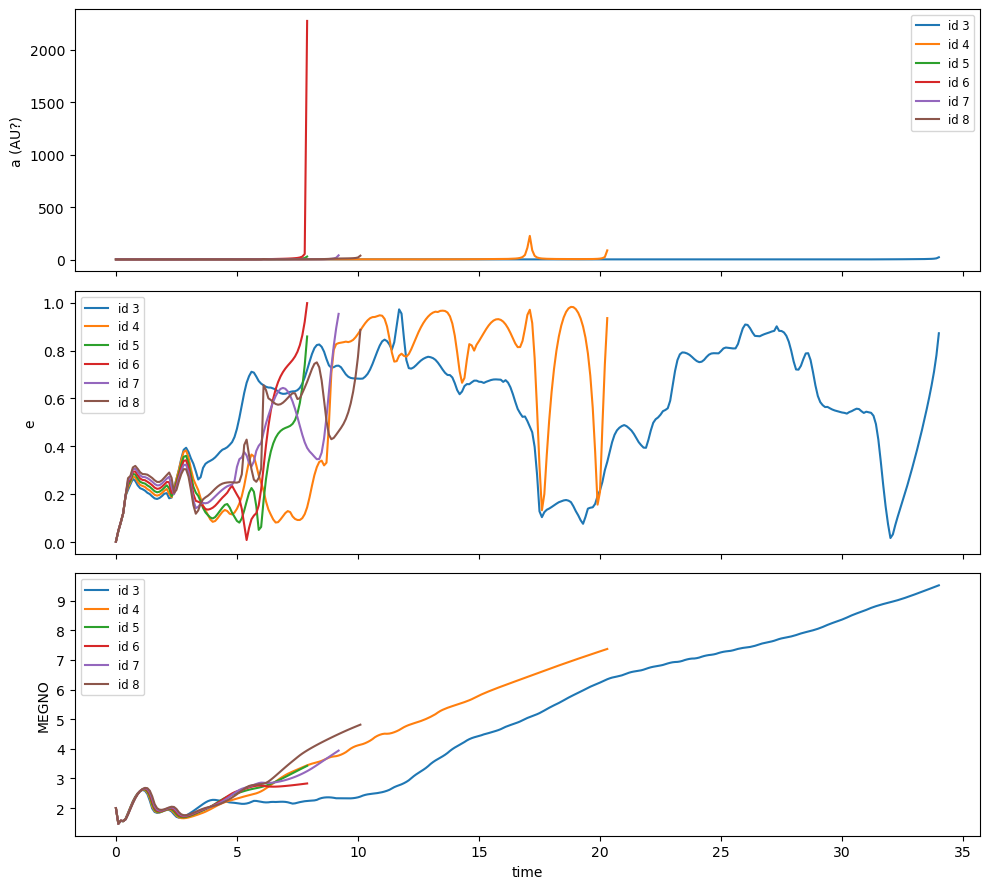

In [3]:
# Time-series evolution plot for selected particles
# Reads time-sequence output (e.g. `ncorp13.dat`), groups by particle id and
# plots a(t), e(t) and MEGNO(t) when available.
import io
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_particle_evolution(fn='ncorp13.dat', ids=None, N_PLANETAS=2, max_particles=10, out='particles_evolution.png'):
    p = pathlib.Path(fn)
    if not p.exists():
        print(f"File {fn} not found in notebook working directory: {pathlib.Path.cwd()}")
        return

    # Read whole file and normalize Fortran 'D' exponent if present
    raw = p.read_text()
    raw = raw.replace('D', 'E')
    sio = io.StringIO(raw)

    # read with whitespace delim
    df = pd.read_csv(sio, delim_whitespace=True, header=None, comment='!')
    ncol = df.shape[1]
    print(f"Read {len(df)} rows with {ncol} columns from {fn}")

    # assign sensible column names if we have at least 11 columns
    if ncol >= 11:
        columns = ['t', 'id', 'a', 'e', 'I', 'M', 'w', 'Omega', 'MEGNO', 'Delta_a', 'Delta_e']
        # if there are extra columns, append generic names
        if ncol > len(columns):
            columns += [f'X{i}' for i in range(len(columns)+1, ncol+1)]
        df.columns = columns[:ncol]
    else:
        # generic names
        df.columns = [f'c{i}' for i in range(1, ncol+1)]

    # coerce to numeric
    df = df.apply(pd.to_numeric, errors='coerce')

    # choose particle ids: by default IDs > N_PLANETAS (test particles)
    unique_ids = sorted(df['id'].unique())
    test_ids = [int(x) for x in unique_ids if x > N_PLANETAS]

    if ids is None:
        if len(test_ids) == 0:
            print('No particle ids found with id > N_PLANETAS. Showing all ids instead.')
            candidate = unique_ids[:max_particles]
        else:
            candidate = test_ids[:max_particles]
    else:
        candidate = ids

    print('Plotting ids:', candidate)

    # make subplots
    has_megno = 'MEGNO' in df.columns
    nrows = 3 if has_megno else 2
    fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(10, 3*nrows), sharex=True)
    if nrows == 2:
        ax_a, ax_e = axes
        ax_meg = None
    else:
        ax_a, ax_e, ax_meg = axes

    for pid in candidate:
        sub = df[df['id'] == pid].sort_values('t')
        if sub.empty:
            print(f'  id {pid}: no rows, skipping')
            continue
        t = sub['t'].values
        ax_a.plot(t, sub['a'].values, label=f'id {pid}')
        ax_e.plot(t, sub['e'].values, label=f'id {pid}')
        if has_megno:
            ax_meg.plot(t, sub['MEGNO'].values, label=f'id {pid}')

    ax_a.set_ylabel('a (AU?)')
    ax_e.set_ylabel('e')
    if has_megno:
        ax_meg.set_ylabel('MEGNO')
    axes[-1].set_xlabel('time')

    # legends
    ax_a.legend(loc='best', fontsize='small')
    ax_e.legend(loc='best', fontsize='small')
    if has_megno:
        ax_meg.legend(loc='best', fontsize='small')

    plt.tight_layout()
    fig.savefig(out, dpi=150)
    print(f'Saved figure to {out}')
    return df


# Run the helper with defaults: pick up to 6 test particles (id > N_PLANETAS)
df_ts = plot_particle_evolution(fn='ncorp13.dat', N_PLANETAS=2, max_particles=6)

# show a small summary table for the particles plotted
if df_ts is not None:
    ids_plotted = sorted(df_ts['id'].unique())[:6]
    summary = []
    for pid in ids_plotted:
        sub = df_ts[df_ts['id']==pid]
        summary.append({'id': int(pid), 'n_rows': len(sub), 'a0': sub['a'].iloc[0], 'e0': sub['e'].iloc[0], 'MEGNO_last': sub['MEGNO'].iloc[-1] if 'MEGNO' in sub.columns else np.nan})
    display(pd.DataFrame(summary))


Primeras 20 condiciones iniciales (orden de `particles.in` -> ID = N_PLANETAS+1 ...):


,ID,a_in,e_in,I_in,M_in,w_in,Omega_in
0,3,1.276000,0.000000,0.000000,112.500000,350.000000,0.000000
1,4,1.290200,0.000000,0.000000,112.500000,350.000000,0.000000
2,5,1.304300,0.000000,0.000000,112.500000,350.000000,0.000000
3,6,1.318500,0.000000,0.000000,112.500000,350.000000,0.000000
4,7,1.332700,0.000000,0.000000,112.500000,350.000000,0.000000
5,8,1.346900,0.000000,0.000000,112.500000,350.000000,0.000000
6,9,1.361000,0.000000,0.000000,112.500000,350.000000,0.000000
7,10,1.375200,0.000000,0.000000,112.500000,350.000000,0.000000
8,11,1.389400,0.000000,0.000000,112.500000,350.000000,0.000000
9,12,1.403500,0.000000,0.000000,112.500000,350.000000,0.000000


Series temporales leídas: 8297 filas, 11 columnas


,ID,MEGNO_final,Delta_e_max,Delta_a_max,is_particle
2,3,9.516860,3.562598,0.968960,True
3,4,7.369895,3.562598,0.979346,True
25,26,6.541668,3.562598,0.995778,True
12,13,5.338113,3.562598,0.987487,True
29,30,5.170241,3.562598,0.910819,True
24,25,5.163618,3.562598,0.994862,True
7,8,4.815175,3.562598,0.883427,True
30,31,4.457375,3.562598,0.939086,True
23,24,4.433218,3.562598,0.994292,True
8,9,4.097055,3.562598,0.996063,True


IDs seleccionados para plot: [3, 4, 26, 13, 30, 25]
Figura guardada: particles_evolution_id3.png


/tmp/ipykernel_7813/2192513905.py:125: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  a.legend()


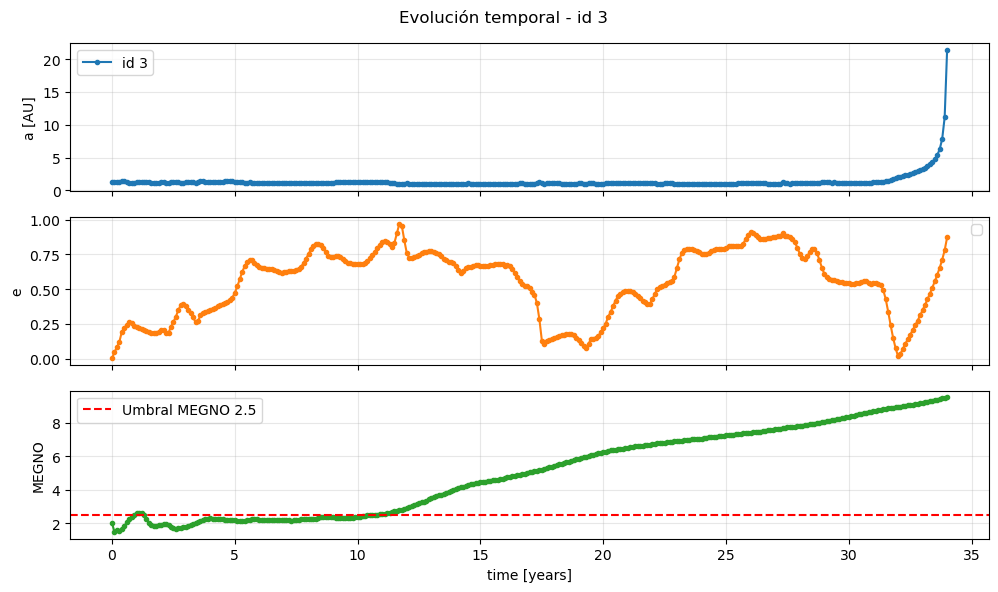

Figura guardada: particles_evolution_id4.png


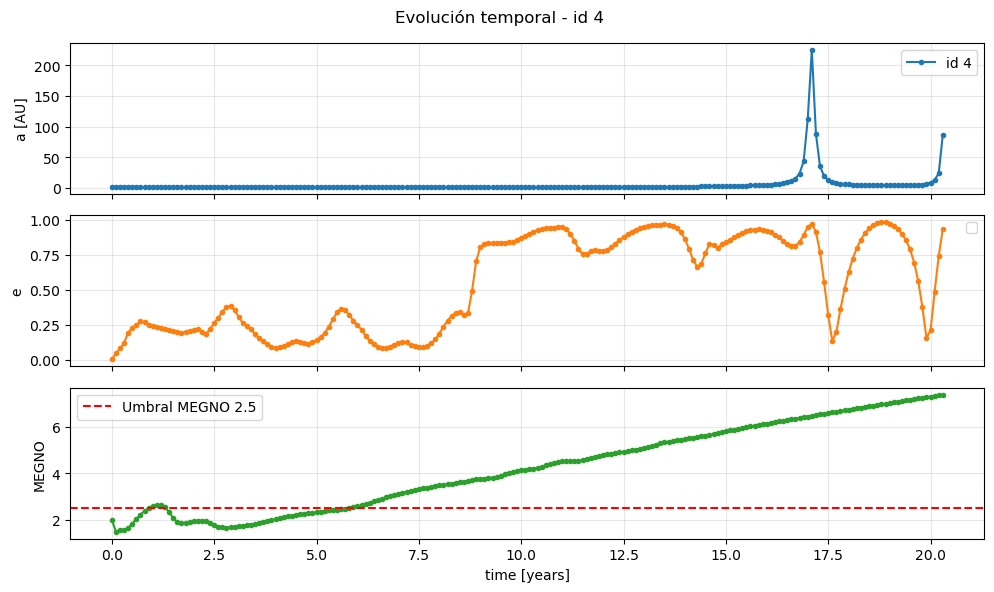

Figura guardada: particles_evolution_id26.png


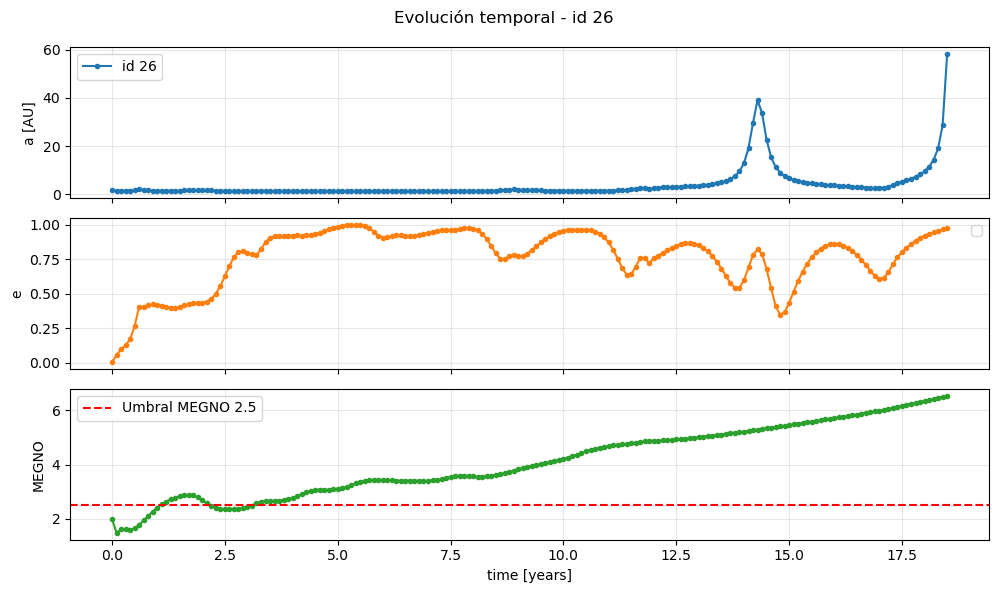

Figura guardada: particles_evolution_id13.png


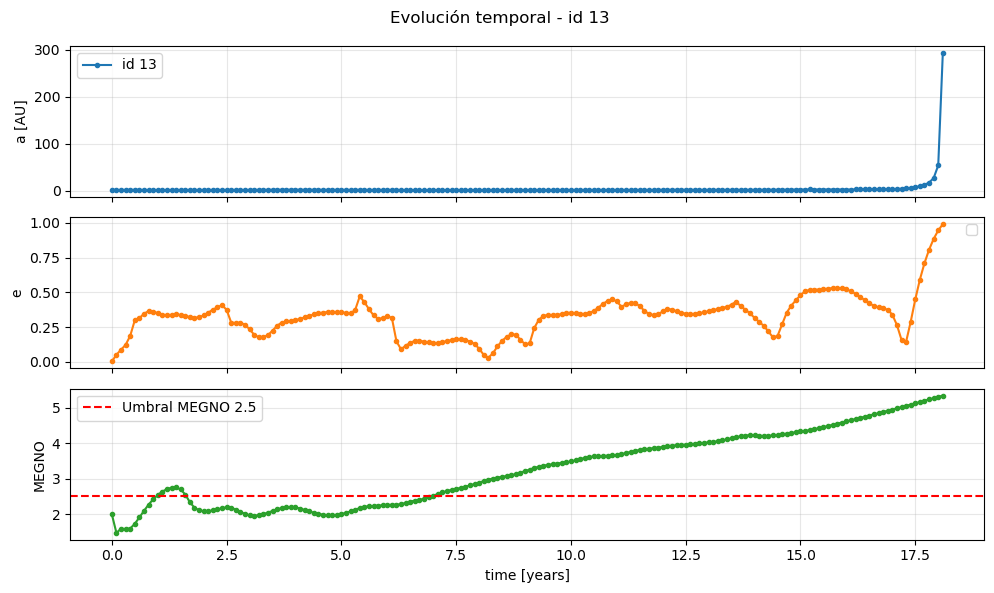

Figura guardada: particles_evolution_id30.png


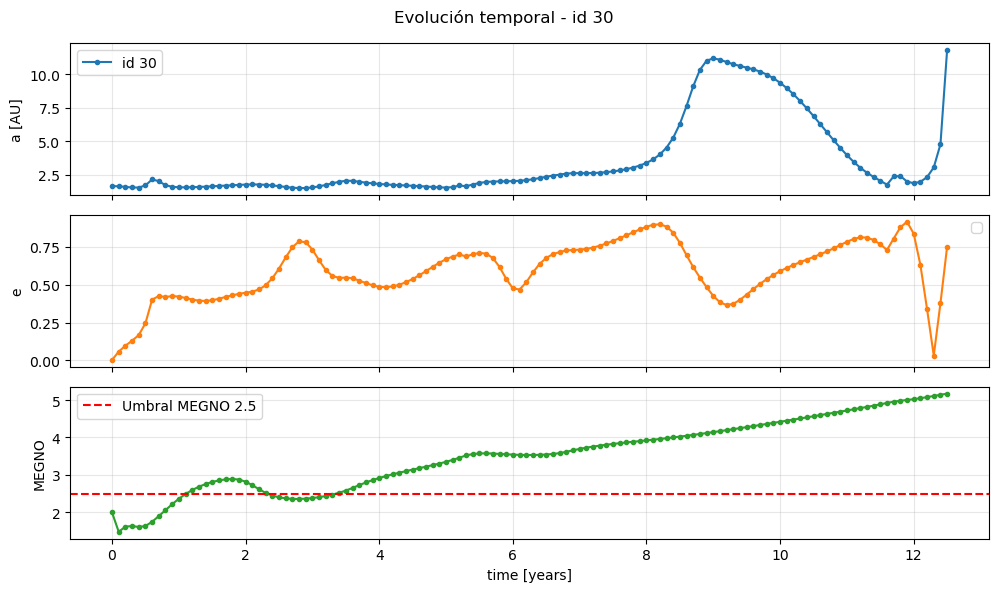

Figura guardada: particles_evolution_id25.png


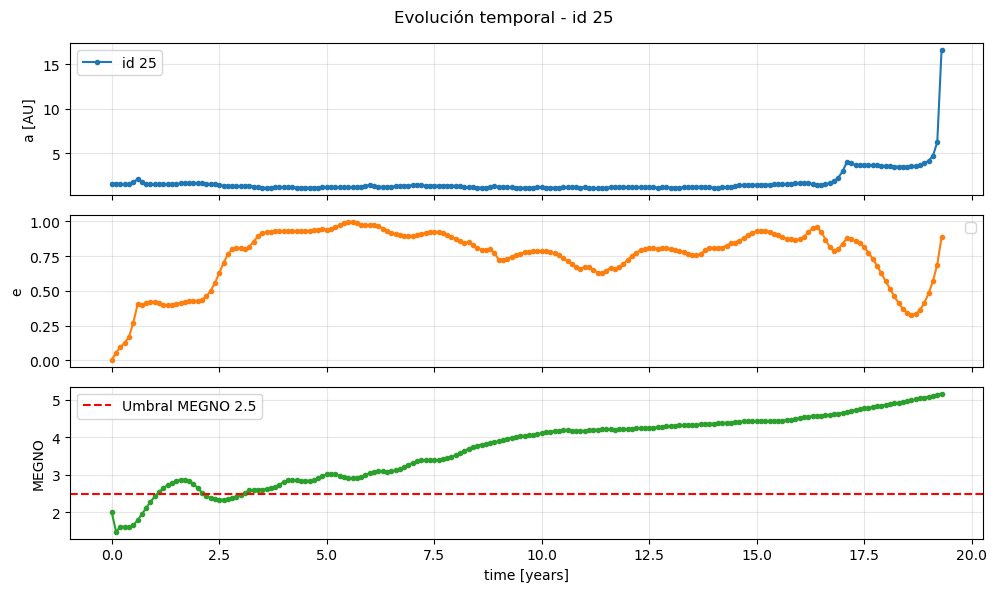

Resumen MEGNO guardado en megno_summary.csv


In [4]:
# Evaluar condiciones iniciales de las partículas y su evolución temporal
# - Lee `particles.in` para obtener condiciones iniciales (a,e,i,M,w,Omega)
# - Lee `ncorp13.dat` (o `chaos.dat`) para obtener la evolución temporal de todos los cuerpos
# - Mapea IDs (planetas 1..N_PLANETAS, partículas N_PLANETAS+1 ..) y dibuja a(t), e(t) y MEGNO(t)

import io
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def read_fortran_table(filename, ncols=None):
    p = Path(filename)
    if not p.exists():
        raise FileNotFoundError(f"No existe {filename}")
    raw = p.read_text()
    raw = raw.replace('D+', 'E+').replace('D-', 'E-').replace('d+', 'E+').replace('d-', 'E-')
    return pd.read_csv(io.StringIO(raw), sep=r"\s+", header=None, engine='python')


def load_particles_in(particles_fn='particles.in', N_PLANETAS=2):
    # partículas: a e i M w Omega (6 columnas esperadas)
    p = Path(particles_fn)
    if not p.exists():
        print(f"Archivo {particles_fn} no encontrado. No se cargarán condiciones iniciales desde él.")
        return None
    dfp = read_fortran_table(particles_fn)
    # for safety, coerce numeric
    dfp = dfp.apply(pd.to_numeric, errors='coerce')
    # common formats: 6 columns (a,e,i,M,w,Omega) or 7 with radius
    if dfp.shape[1] >= 6:
        dfp = dfp.iloc[:, :6]
        dfp.columns = ['a_in','e_in','I_in','M_in','w_in','Omega_in']
    else:
        # fallback: generic columns
        dfp.columns = [f'c{i}' for i in range(dfp.shape[1])]
    # assign IDs based on order: first particle -> N_PLANETAS+1
    dfp = dfp.reset_index(drop=True)
    dfp['ID'] = dfp.index + (N_PLANETAS + 1)
    return dfp


def load_time_series(time_fn='ncorp13.dat'):
    # prefer ncorp13.dat, fallback to chaos.dat
    p = Path(time_fn)
    if not p.exists():
        p2 = Path('chaos.dat')
        if p2.exists():
            p = p2
        else:
            raise FileNotFoundError('No se encontró ni ncorp13.dat ni chaos.dat en el directorio.')
    df = read_fortran_table(p)
    ncol = df.shape[1]
    if ncol >= 11:
        df.columns = ['time','ID','a','e','I','M','w','Omega','MEGNO','Delta_a','Delta_e'] + [f'X{i}' for i in range(12, ncol+1)]
    else:
        # generic names
        df.columns = [f'c{i}' for i in range(1, ncol+1)]
        # if first columns look like time,ID,a,e try to rename heuristically
        if ncol >= 4:
            df = df.rename(columns={'c1':'time','c2':'ID','c3':'a','c4':'e'})
    # coerce numeric
    df = df.apply(pd.to_numeric, errors='coerce')
    return df


def summarize_initial_conditions(dfp, show=20):
    if dfp is None:
        print('No hay archivo particles.in para mostrar condiciones iniciales.')
        return
    display_cols = [c for c in ['ID','a_in','e_in','I_in','M_in','w_in','Omega_in'] if c in dfp.columns]
    print(f"Primeras {show} condiciones iniciales (orden de `particles.in` -> ID = N_PLANETAS+1 ...):")
    display(dfp[display_cols].head(show))


def compute_megno_summary(dfts, N_PLANETAS=2):
    # calcula MEGNO final por ID y Delta_e,max etc.
    if 'ID' not in dfts.columns:
        raise ValueError('El DataFrame de series temporales no tiene columna ID')
    grouped = dfts.groupby('ID')
    # obtener MEGNO final (último valor temporal no-NaN) y max Delta_e
    megno_final = grouped['MEGNO'].apply(lambda g: g.dropna().iloc[-1] if len(g.dropna())>0 else np.nan)
    deltae_max = grouped['Delta_e'].apply(lambda g: g.max() if 'Delta_e' in dfts.columns else np.nan)
    deltaa_max = grouped['Delta_a'].apply(lambda g: g.max() if 'Delta_a' in dfts.columns else np.nan)
    summary = pd.DataFrame({'MEGNO_final': megno_final, 'Delta_e_max': deltae_max, 'Delta_a_max': deltaa_max})
    summary = summary.reset_index()
    # marcar planetas vs partículas
    summary['is_particle'] = summary['ID'] > N_PLANETAS
    return summary


def plot_evolution_for_ids(dfts, ids, out_prefix='evol', show_megno=True):
    # ids: iterable of integer IDs
    n = len(ids)
    for pid in ids:
        sub = dfts[dfts['ID']==pid].sort_values('time')
        if sub.empty:
            print(f'id {pid}: no hay datos temporales, saltando')
            continue
        fig, axes = plt.subplots(3 if show_megno and 'MEGNO' in dfts.columns else 2, 1, figsize=(10, 6), sharex=True)
        if isinstance(axes, np.ndarray):
            ax_a = axes[0]
            ax_e = axes[1]
            ax_meg = axes[2] if (show_megno and 'MEGNO' in dfts.columns) else None
        else:
            ax_a = axes
            ax_e = None
            ax_meg = None
        t = sub['time'].values
        ax_a.plot(t, sub['a'].values, '-o', ms=3, label=f'id {pid}')
        ax_a.set_ylabel('a [AU]')
        if ax_e is not None:
            ax_e.plot(t, sub['e'].values, '-o', ms=3, color='C1')
            ax_e.set_ylabel('e')
        if ax_meg is not None:
            ax_meg.plot(t, sub['MEGNO'].values, '-o', ms=3, color='C2')
            ax_meg.set_ylabel('MEGNO')
            ax_meg.axhline(2.5, color='r', ls='--', label='Umbral MEGNO 2.5')
        axes = fig.get_axes()
        axes[-1].set_xlabel('time [years]')
        fig.suptitle(f'Evolución temporal - id {pid}')
        for a in axes:
            a.grid(alpha=0.3)
            a.legend()
        plt.tight_layout()
        out = f'{out_prefix}_id{int(pid)}.png'
        fig.savefig(out, dpi=150)
        print(f'Figura guardada: {out}')
        plt.show()


# --- Ejecutar flujo básico ---
N_PLANETAS = 2
# 1) cargar condiciones iniciales (particles.in)
df_particles = load_particles_in('particles.in', N_PLANETAS=N_PLANETAS)
# mostrar primeras condiciones
summarize_initial_conditions(df_particles, show=20)

# 2) cargar series temporales (ncorp13.dat o chaos.dat)
df_time = load_time_series('ncorp13.dat')
print(f"Series temporales leídas: {df_time.shape[0]} filas, {df_time.shape[1]} columnas")

# 3) obtener resumen por ID (MEGNO final, Δe máximo)
try:
    megno_summary = compute_megno_summary(df_time, N_PLANETAS=N_PLANETAS)
    display(megno_summary.sort_values('MEGNO_final', ascending=False).head(20))
except Exception as e:
    print('No se pudo computar resumen MEGNO:', e)
    megno_summary = None

# 4) seleccionar partículas para plotear
# opción A: el top-N por MEGNO_final
if megno_summary is not None:
    particles_only = megno_summary[megno_summary['is_particle']].copy()
    particles_only = particles_only.sort_values('MEGNO_final', ascending=False)
    top_ids = particles_only['ID'].astype(int).tolist()[:6]
else:
    # fallback: tomar las primeras 6 IDs > N_PLANETAS desde df_particles
    if df_particles is not None:
        top_ids = df_particles['ID'].astype(int).tolist()[:6]
    else:
        top_ids = sorted(df_time['ID'].unique())[:6]

print('IDs seleccionados para plot:', top_ids)
# 5) plotear evolución para esos IDs
plot_evolution_for_ids(df_time, top_ids, out_prefix='particles_evolution')

# 6) guardar resumen de MEGNO si es posible
if megno_summary is not None:
    megno_summary.to_csv('megno_summary.csv', index=False)
    print('Resumen MEGNO guardado en megno_summary.csv')


In [5]:
# Detecto aquellas particulas que hayan quedado en órbitas estables
# (MEGNO final < 2.5 y Δe máximo < 0.2) y las guardo en un archivo separado.

if megno_summary is not None:
    stable_particles = megno_summary[
        (megno_summary['is_particle']) &
        (megno_summary['MEGNO_final'] < 2.5) &
        (megno_summary['Delta_e_max'] < 0.2)
    ]
    stable_particles.to_csv('stable_particles.csv', index=False)
    print(f'Se encontraron {len(stable_particles)} partículas estables. Guardadas en stable_particles.csv')

# Ahora ploteo las órbitas de estas partículas estables en un diagrama a vs e.
if not stable_particles.empty:
    df_stable = df_time[df_time['ID'].isin(stable_particles['ID'])]
    plt.figure(figsize=(9,7))
    plt.scatter(df_stable['a'], df_stable['e'], c='g', s=50, edgecolor='k', alpha=0.7)
    plt.xlabel('a [AU]')
    plt.ylabel('e')
    plt.title('Órbitas de partículas estables (a vs e)')
    plt.grid(alpha=0.3)
    plt.savefig("stable_particles_orbits.png", dpi=300)

Se encontraron 0 partículas estables. Guardadas en stable_particles.csv
